<a href="https://colab.research.google.com/github/subaruosawa/network-analyze/blob/main/recommend_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install japanize-matplotlib

In [ ]:
import json
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
from community import community_louvain
import community

In [ ]:
with open("/content/drive/My Drive/jaccard_fin.json") as f:
  jaccard = json.load(f)
with open("/content/drive/My Drive/flow_fin.json") as f:
  flow = json.load(f)
with open("/content/drive/My Drive/aId_3rd_finset.json") as f:
  aId = json.load(f)
with open("/content/drive/My Drive/mean.json") as f:
  mean = json.load(f)
with open("/content/drive/My Drive/entry.json") as f:
  entry = json.load(f)
with open("/content/drive/My Drive/liver_sex.json") as f:
  sex = json.load(f)
with open("/content/drive/My Drive/liver_debut.json") as f:
  debut_str = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  real_name = json.load(f)

In [ ]:
debut = []
for i in debut_str:
  debut.append(datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9))).date()
   - datetime.datetime.strptime(i,'%Y-%m-%d').date())

In [ ]:
with open("/content/drive/My Drive/real_name.json") as f:
  name_alpha = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  name_beta = json.load(f)

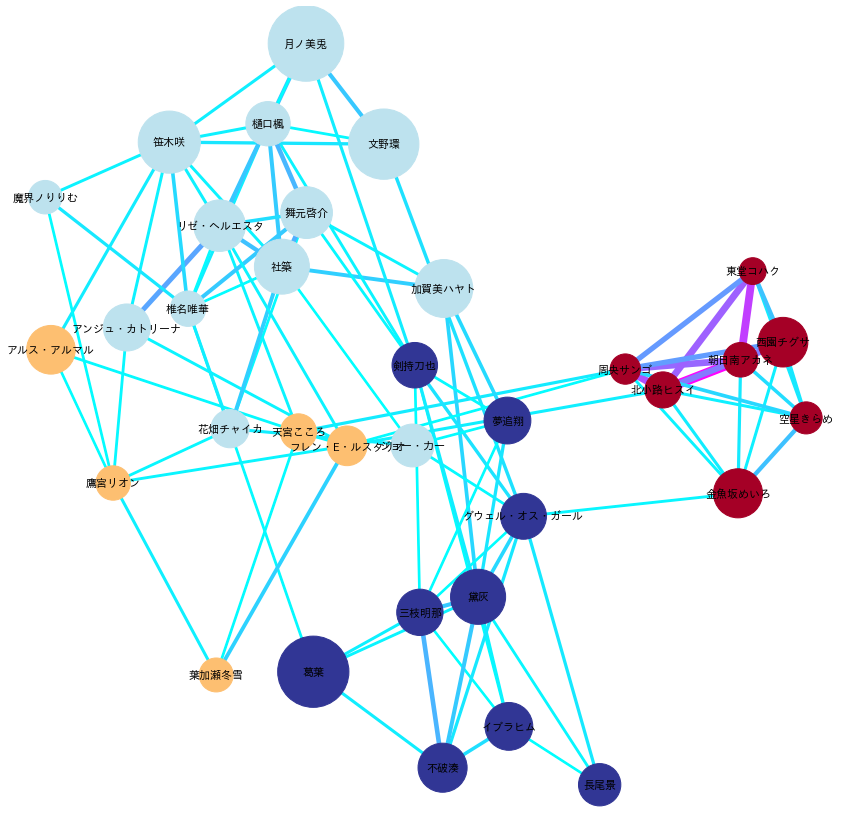

In [ ]:
G = nx.Graph()

for i in range(106):
  G.add_node(real_name[i],
             count = len(aId[i]),
             sex = sex[i],
             debut = debut[i],
             name = real_name[i])

n = 0
del name_alpha[-1]
del name_beta[0]
for alpha in name_alpha:
  for beta in name_beta:
    if not jaccard[3][n] == 0: 
      G.add_edge(alpha,beta,weight = jaccard[3][n])
    n += 1
  del name_beta[0]

#オプション：デビュー時期
#for n,d in list(G.nodes(data=True)):
  #if d["sex"] == "man":
    #G.remove_node(n)

#オプション：性別
#for n,d in list(G.nodes(data=True)):
  #if d["debut"] >= datetime.timedelta(365):
    #G.remove_node(n)

for u,v,d in list(G.edges(data=True)):
  if d["weight"] <= 0.026:
    G.remove_edge(u,v)

for name,deg in list(G.degree):
  if deg <= 3:
    G.remove_node(name)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.2)
deg = nx.degree_centrality(G).values()
partition=community.best_partition(G)
nx.draw_networkx(G, pos, with_labels=True,font_family="IPAexGothic",font_size=11)
cliques = nx.find_cliques(G)

node_size = [ d["count"]**1.1 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=node_size,
                       #node_color=list(deg),
                       node_color=list(partition.values()),
                       cmap=plt.cm.RdYlBu
                       )  
edge_width = [ d['weight']*100 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color=edge_width, width=edge_width, edge_cmap=plt.cm.cool)

plt.axis('off')
plt.show()

In [ ]:
input = "月ノ美兎"
print("繋がりがある中で一番他ライバーとも繋がりを持つライバー")
degree = []
for i in G.adj[input]:
  degree.append(nx.degree_centrality(G)[i])
adj_deg = dict(zip(G.adj[input],degree))
print("ライバー名:"+max(adj_deg, key=adj_deg.get))
print("次数(繋がりの数)の大きさ:"+str(max(adj_deg.values())))
print("■■■■■■■■■■■■■■■■■■■■■■■■■")
print("選択ライバーと一番ファン層が類似しているライバー")
weight = []
for k,v in G.adj[input].items():
  weight.append(v["weight"])
adj_wei = dict(zip(G.adj[input],weight))
print("ライバー名:"+max(adj_wei, key=adj_wei.get))
print("Jaccard係数(被っているファンの多さ):"+str(max(adj_wei.values())))

繋がりがある中で一番他ライバーとも繋がりを持つライバー
ライバー名:笹木咲
次数(繋がりの数)の大きさ:0.2727272727272727
■■■■■■■■■■■■■■■■■■■■■■■■■
選択ライバーと一番ファン層が類似しているライバー
ライバー名:樋口楓
Jaccard係数(被っているファンの多さ):0.04147331786542923
